# Importando bibliotecas

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import vectorbt as vbt
from datetime import datetime

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
#chamando funcao
import functions as aux

# Verificando estrutura do data frame

In [3]:
#definindo nome da carteira teorica que será utilizada
carteira_teorica = 'ibov'
#url = f'https://github.com/jnyjhow/portfolio_ds_mf/blob/main/result/db_ct_{carteira_teorica}_mod_setor.csv'
url = f'../result/db_ct_{carteira_teorica}_mod_setor.csv'

In [4]:
#abrindo o arquivo .csv
df = pd.read_csv(url)

In [5]:
#verificando nome das colunas
df.columns

Index(['ATIVO', 'NOME_EMPRESA', 'TIPO', 'QTD_TEORICA', 'PORC_PART', 'setor',
       'sub_setor', 'segmento', 'REDUTOR', 'PROPORCAO_QTD', 'DATA_REF',
       'DATE_UPDATE', 'CARTEIRA_TEORICA'],
      dtype='object')

In [6]:
#verificando setor
df['setor'].unique()

array(['petroleo_gas_e_biocombustiveis', 'consumo_ciclico',
       'consumo_nao_ciclico', 'OTHERS', 'bens_industriais', 'financeiro',
       'materiais_basicos', 'utilidade_publica', 'saude',
       'tecnologia_da_informacao', 'comunicacoes'], dtype=object)

In [7]:
#verificando sub-setor
df['sub_setor'].unique()

array(['petroleo_gas_e_biocombustiveis', 'tecidos_vestuario_e_calcados',
       'bebidas', 'OTHERS', 'transporte', 'servicos_financeiros_diversos',
       'intermediarios_financeiros', 'previdencia_e_seguros',
       'exploracao_de_imoveis', 'mineracao', 'quimicos',
       'alimentos_processados', 'comercio_e_distribuicao',
       'energia_eletrica', 'diversos', 'viagens_e_lazer',
       'construcao_civil', 'material_de_transporte',
       'servicos_medico__hospitalares_analises_e_diagnosticos',
       'siderurgia_e_metalurgia', 'produtos_de_uso_pessoal_e_de_limpeza',
       'comercio', 'madeira_e_papel', 'programas_e_servicos',
       'computadores_e_equipamentos', 'agua_e_saneamento', 'agropecuaria',
       'telecomunicacoes', 'maquinas_e_equipamentos'], dtype=object)

In [8]:
#verificando as primeiras linhas do df
df.head()

ATIVO  NOME_EMPRESA        TIPO  QTD_TEORICA  PORC_PART  \
0  RRRP3  3R PETROLEUM  ON      NM    200372163      0.330   
1  ALPA4    ALPARGATAS  PN      N1    201257220      0.203   
2  ABEV3     AMBEV S/A          ON   4380195841      3.314   
3  AMER3    AMERICANAS  ON      NM    596875824      0.449   
4  ASAI3         ASSAI  ON      NM    794531367      0.709   

                            setor                       sub_setor  \
0  petroleo_gas_e_biocombustiveis  petroleo_gas_e_biocombustiveis   
1                 consumo_ciclico    tecidos_vestuario_e_calcados   
2             consumo_nao_ciclico                         bebidas   
3                          OTHERS                          OTHERS   
4                          OTHERS                          OTHERS   

                           segmento       REDUTOR  PROPORCAO_QTD    DATA_REF  \
0  exploracao_refino_e_distribuicao  1.803263e+07      11.111644  2022-08-16   
1                          calcados  1.803263e+07      11.160725  2022-08-16   
2          cervejas_e_refrigerantes  1.803263e+07     242.903894  2022-08-16   
3                            OTHERS  1.803263e+07      33.099767  2022-08-16   
4                            OTHERS  1.803263e+07      44.060761  2022-08-16   

  DATE_UPDATE          CARTEIRA_TEORICA  
0  2022-08-16  CARTEIRA_TEORICA_B3_IBOV  
1  2022-08-16  CARTEIRA_TEORICA_B3_IBOV  
2  2022-08-16  CARTEIRA_TEORICA_B3_IBOV  
3  2022-08-16  CARTEIRA_TEORICA_B3_IBOV  
4  2022-08-16  CARTEIRA_TEORICA_B3_IBOV

# Estudo de Caso

## Gerando gráficos interativos

#### O gráfico abaixo representa o quanto cada ativo corresponde em % na carteira teórica em seu respectivo setor e sub-setor.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


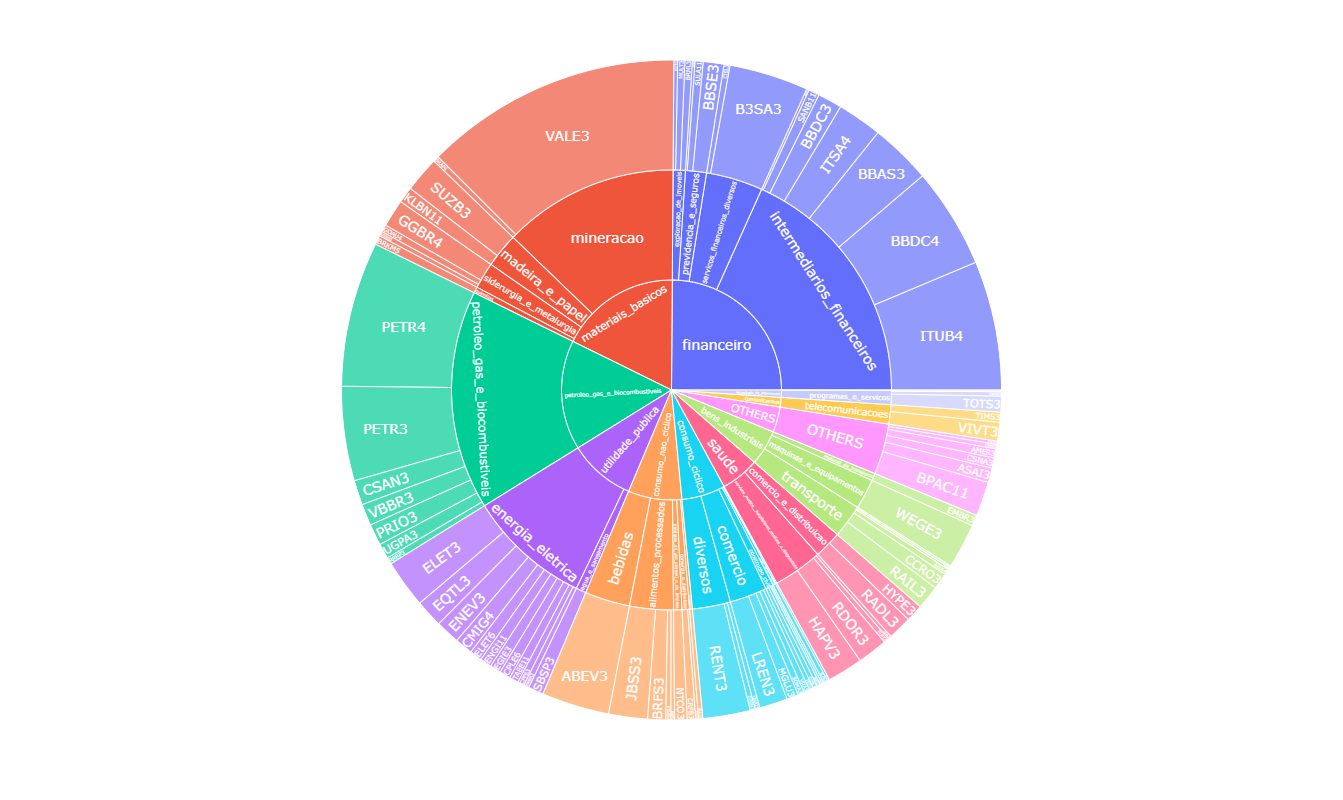

In [9]:
HEIGHT_NUMBER = 800
fig = px.sunburst(df, path=['setor', 'sub_setor', 'ATIVO'], values='PORC_PART', height=HEIGHT_NUMBER)

fig.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()

#### Outra maneira de visualizar o gráfico interativo.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



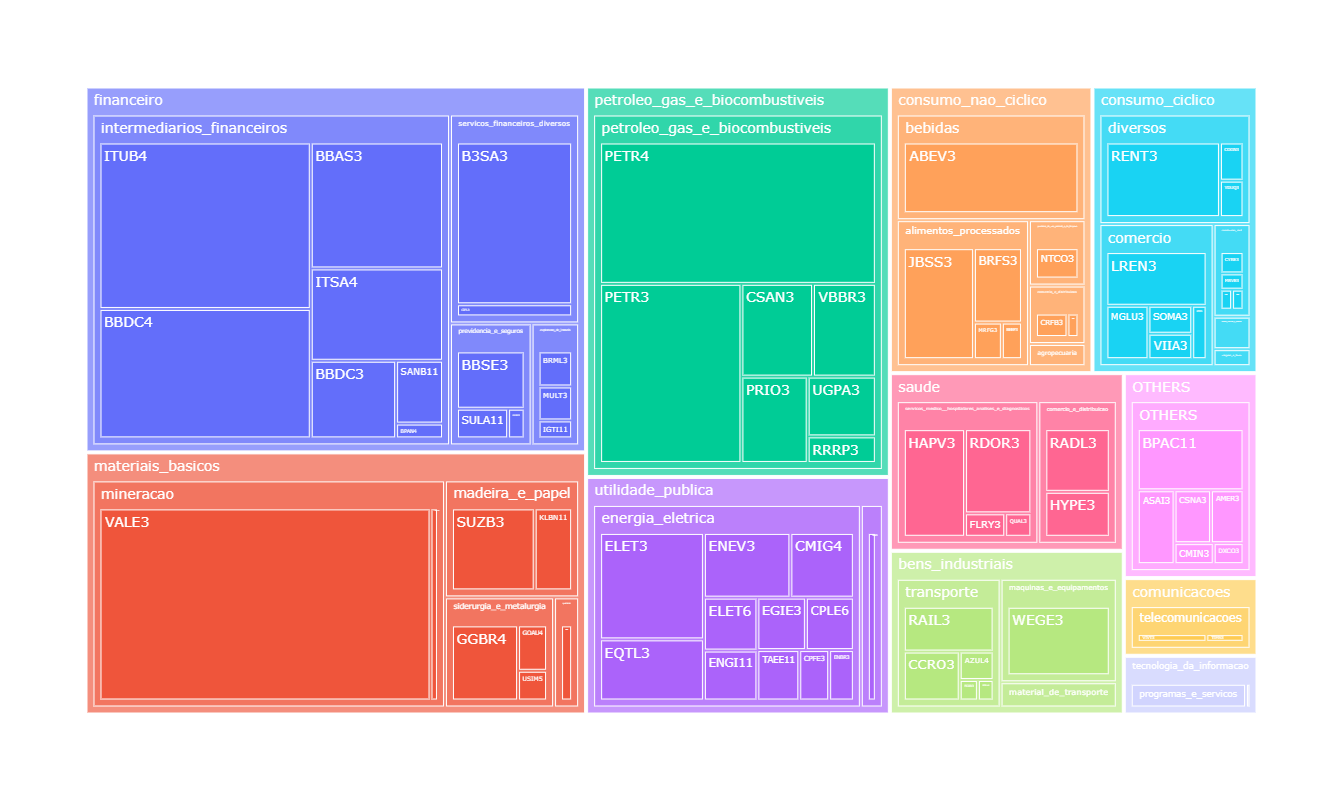

In [10]:
fig = px.treemap(df, path=['setor', 'sub_setor', 'ATIVO'], values='PORC_PART', height=HEIGHT_NUMBER)

fig.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()

## Obtendo o valor dos dividendos da carteira teórica

In [11]:
#verificando os ativos por ordem alfabética
df.ATIVO.sort_values()

2     ABEV3
1     ALPA4
3     AMER3
4     ASAI3
5     AZUL4
      ...  
87    VBBR3
86    VIIA3
80    VIVT3
88    WEGE3
89    YDUQ3
Name: ATIVO, Length: 90, dtype: object

### Tratando arquivos com ".SA" para padronizar os tickers para obter dados do yahoo finance.

In [12]:
tickers_yf = [x + '.SA' for x in df.ATIVO]
#verificando os 5 primeiros ativos
tickers_yf[0:5]

['RRRP3.SA', 'ALPA4.SA', 'ABEV3.SA', 'AMER3.SA', 'ASAI3.SA']

In [13]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2022-08-16'

In [14]:
#definindo a data inicial
data_inicial = '2000-01-01'

In [16]:
#obtendo os dividendos dos ativos através do vectorbt
df_tickers_dividends = vbt.YFData.download(tickers_yf, start=data_inicial, end=data_atual).get('Dividends')

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-pac

In [17]:
#verificando df
df_tickers_dividends

symbol                     RRRP3.SA  ALPA4.SA  ABEV3.SA  AMER3.SA  ASAI3.SA  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00+00:00       NaN       NaN       0.0       NaN       NaN   
2000-01-06 00:00:00+00:00       NaN       NaN       0.0       NaN       NaN   
2000-01-07 00:00:00+00:00       NaN       NaN       0.0       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   

symbol                     AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  BRML3.SA  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-06 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-07 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   

symbol                     ...  VIVT3.SA  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
Date                       ...                                           
2000-01-03 00:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-05 00:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-06 00:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-07 00:00:00+00:00  ...       0.0       NaN       NaN       NaN   
...                        ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00  ...       NaN       NaN       NaN       NaN   

symbol                     USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  WEGE3.SA  \
Date                                                                          
2000-01-03 00:00:00+00:00       0.0  0.000000       0.0       NaN       0.0   
2000-01-04 00:00:00+00:00       0.0  0.000000       0.0       NaN       0.0   
2000-01-05 00:00:00+00:00       0.0  0.000000       0.0       NaN       0.0   
2000-01-06 00:00:00+00:00       0.0  0.000000       0.0       NaN       0.0   
2000-01-07 00:00:00+00:00       0.0  0.000000       0.0       NaN       0.0   
...                             ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00       0.0  0.000000       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00       0.0  0.000000       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00       0.0  3.572057       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00       0.0  0.000000       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00       N

In [18]:
#verificando as últimas linhas do df
df_tickers_dividends.tail()

symbol                     RRRP3.SA  ALPA4.SA  ABEV3.SA  AMER3.SA  ASAI3.SA  \
Date                                                                          
2022-08-10 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   

symbol                     AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  BRML3.SA  \
Date                                                                          
2022-08-10 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   

symbol                     ...  VIVT3.SA  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
Date                       ...                                           
2022-08-10 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00  ...       NaN       NaN       NaN       NaN   

symbol                     USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  WEGE3.SA  \
Date                                                                          
2022-08-10 00:00:00+00:00       0.0  0.000000       0.0       0.0       0.0   
2022-08-11 00:00:00+00:00       0.0  0.000000       0.0       0.0       0.0   
2022-08-12 00:00:00+00:00       0.0  3.572057       0.0       0.0       0.0   
2022-08-15 00:00:00+00:00       0.0  0.000000       0.0       0.0       0.0   
2022-08-16 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   

symbol                     YDUQ3.SA  
Date                                 
2022-08-10 00:00:00+00:00       0.0  
2022-08-11 00:00:00+00:00       0.0  
2022-08-12 00:00:00+00:00       0.0  
2022-08-15 00:00:00+00:00       0.0  
2022-08-16 00:00:00+00:00       NaN  

[5 rows x 90 columns]

In [19]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
df_total_dividends = df_tickers_dividends.sum()
df_total_dividends.sort_values(ascending=False)

symbol
CPLE6.SA     168.065481
VIVT3.SA      46.244442
VALE3.SA      40.315284
TAEE11.SA     30.006633
PETR4.SA      28.057048
                ...    
RAIL3.SA       0.019307
CASH3.SA       0.006177
PRIO3.SA       0.000000
AZUL4.SA       0.000000
RRRP3.SA       0.000000
Length: 90, dtype: float64

In [20]:
#inserindo a coluna ano no df
df_tickers_dividends['year'] = df_tickers_dividends.index.strftime('%Y')

In [23]:
df_pivot_dividends = aux.pfun_pivot_por_ano(df_tickers_dividends, df_tickers_dividends)
df_pivot_dividends.iloc[:, 0:5]

symbol  ABEV3.SA  ALPA4.SA  AMER3.SA  ASAI3.SA  AZUL4.SA
year                                                    
2000    0.000000  0.000000  0.000000  0.000000       0.0
2001    0.000000  0.000000  0.000000  0.000000       0.0
2002    0.000000  0.000000  0.000000  0.000000       0.0
2003    0.000000  0.000000  0.000000  0.000000       0.0
2004    0.000000  0.000000  0.000000  0.000000       0.0
2005    0.000000  0.000000  0.000000  0.000000       0.0
2006    0.000000  0.000000  0.122644  0.000000       0.0
2007    0.016302  0.000000  0.000000  0.000000       0.0
2008    0.097491  0.000000  0.115909  0.000000       0.0
2009    0.163877  0.009009  0.143059  0.000000       0.0
2010    0.117310  0.061423  0.089821  0.000000       0.0
2011    0.217601  0.476419  0.049681  0.000000       0.0
2012    0.476664  0.153830  0.000000  0.000000       0.0
2013    0.257176  0.154010  0.000000  0.000000       0.0
2014    0.593980  0.152876  0.000000  0.000000       0.0
2015    1.580000  0.730639  0.000000  0.000000       0.0
2016    0.640000  0.240310  0.000000  0.000000       0.0
2017    0.540000  0.272388  0.000000  0.000000       0.0
2018    0.550000  0.377027  0.000000  0.000000       0.0
2019    0.490600  0.000000  0.000000  0.000000       0.0
2020    0.413700  0.055166  0.000000  0.000000       0.0
2021    0.680300  0.271712  0.000000  0.110341       0.0
2022    0.000000  0.163027  0.620963  0.125038       0.0

### Plotando gráfico da soma dos dividendos dos 10 primeiros ativos por ano

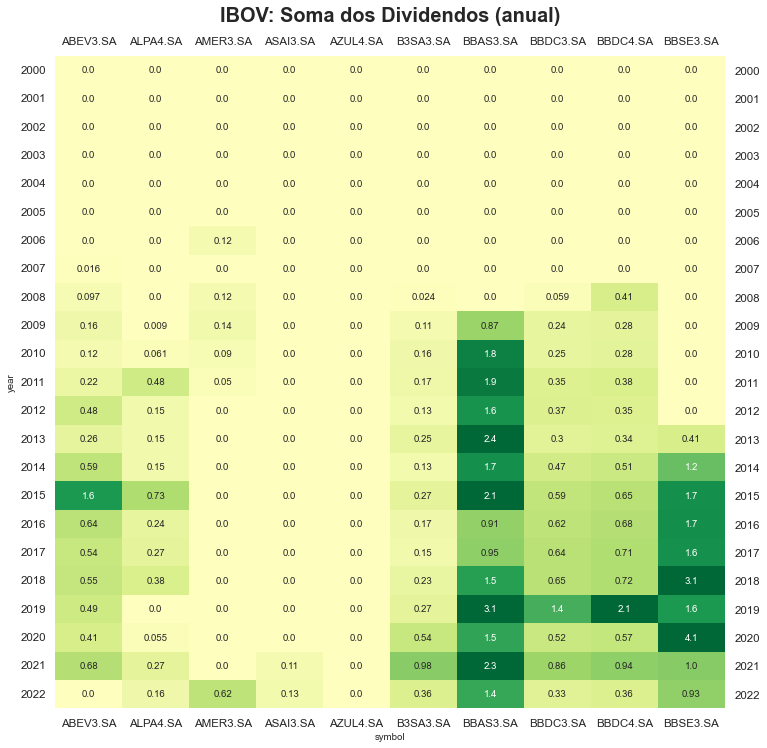

In [25]:
NUMBER_BASE = 0

#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_dividends.iloc[:, 0:10], 'all', carteira_teorica.upper(), 'anual', '.2', NUMBER_BASE)

In [26]:
#obtendo os precos de fechamento dos ativos atraves do vectorbt
df_tickers_close = vbt.YFData.download(tickers_yf, start=data_inicial, end=data_atual).get('Close')

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

D:\anaconda3\lib\site-pac

In [27]:
#verificando df
df_tickers_close

symbol                      RRRP3.SA   ALPA4.SA   ABEV3.SA  AMER3.SA  \
Date                                                                   
2000-01-03 00:00:00+00:00        NaN        NaN        NaN       NaN   
2000-01-04 00:00:00+00:00        NaN        NaN        NaN       NaN   
2000-01-05 00:00:00+00:00        NaN        NaN   0.321626       NaN   
2000-01-06 00:00:00+00:00        NaN        NaN   0.305322       NaN   
2000-01-07 00:00:00+00:00        NaN        NaN   0.305322       NaN   
...                              ...        ...        ...       ...   
2022-08-10 00:00:00+00:00  34.400002  19.680000  15.160000     14.66   
2022-08-11 00:00:00+00:00  34.660000  19.299999  15.130000     13.28   
2022-08-12 00:00:00+00:00  34.799999  19.700001  15.210000     12.96   
2022-08-15 00:00:00+00:00  33.580002  20.540001  15.420000     15.33   
2022-08-16 00:00:00+00:00        NaN        NaN        NaN       NaN   

symbol                      ASAI3.SA   AZUL4.SA  B3SA3.SA  BPAN4.SA  \
Date                                                                  
2000-01-03 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-04 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-05 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-06 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-07 00:00:00+00:00        NaN        NaN       NaN       NaN   
...                              ...        ...       ...       ...   
2022-08-10 00:00:00+00:00  17.540001  14.620000     12.37      7.43   
2022-08-11 00:00:00+00:00  17.639999  14.910000     12.15      7.36   
2022-08-12 00:00:00+00:00  18.000000  16.510000     13.10      7.65   
2022-08-15 00:00:00+00:00  18.200001  17.469999     13.20      7.48   
2022-08-16 00:00:00+00:00        NaN        NaN       NaN       NaN   

symbol                      BBSE3.SA  BRML3.SA  ...   VIVT3.SA  TIMS3.SA  \
Date                                            ...                        
2000-01-03 00:00:00+00:00        NaN       NaN  ...   7.796523       NaN   
2000-01-04 00:00:00+00:00        NaN       NaN  ...   7.585365       NaN   
2000-01-05 00:00:00+00:00        NaN       NaN  ...   7.669827       NaN   
2000-01-06 00:00:00+00:00        NaN       NaN  ...   7.838755       NaN   
2000-01-07 00:00:00+00:00        NaN       NaN  ...   7.877739       NaN   
...                              ...       ...  ...        ...       ...   
2022-08-10 00:00:00+00:00  29.450001      8.83  ...  46.400002     12.92   
2022-08-11 00:00:00+00:00  30.290001      8.63  ...  46.099998     12.89   
2022-08-12 00:00:00+00:00  30.580000      8.85  ...  46.009998     12.74   
2022-08-15 00:00:00+00:00  30.750000      8.88  ...  45.090000     12.48   
2022-08-16 00:00:00+00:00        NaN       NaN  ...        NaN       NaN   

symbol                      TOTS3.SA  UGPA3.SA  USIM5.SA   VALE3.SA  VIIA3.SA  \
Date                                                                            
2000-01-03 00:00:00+00:00        NaN       NaN  1.582737   1.707494  0.996682   
2000-01-04 00:00:00+00:00        NaN       NaN  1.525033   1.666839  0.996682   
2000-01-05 00:00:00+00:00        NaN       NaN  1.670117   1.666839  0.996682   
2000-01-06 00:00:00+00:00        NaN       NaN  1.821796   1.666839  0.996682   
2000-01-07 00:00:00+00:00        NaN       NaN  1.894338   1.727821  0.996682   
...                              ...       ...       ...        ...       ...   
2022-08-10 00:00:00+00:00  30.209999     14.03  9.110000  66.598183  2.960000   
2022-08-11 00:00:00+00:00  29.809999     13.60  9.350000  68.917946  2.790000   
2022-08-12 00:00:00+00:00  30.540001     14.16  9.510000  69.800003  3.180000   
2022-08-15 00:00:00+00:00  30.219999     13.95  9.280000  68.300003  3.640000   
2022-08-16 00:00:00+00:00        NaN       NaN       NaN        NaN       NaN   

symbol                      VBBR3.SA   WEGE3.SA   YDUQ3.SA  
Date                               

In [28]:
#criando a coluna year para armazenar o ano
df_tickers_close['year'] = df_tickers_close.index.strftime('%Y')
df_tickers_close

symbol                      RRRP3.SA   ALPA4.SA   ABEV3.SA  AMER3.SA  \
Date                                                                   
2000-01-03 00:00:00+00:00        NaN        NaN        NaN       NaN   
2000-01-04 00:00:00+00:00        NaN        NaN        NaN       NaN   
2000-01-05 00:00:00+00:00        NaN        NaN   0.321626       NaN   
2000-01-06 00:00:00+00:00        NaN        NaN   0.305322       NaN   
2000-01-07 00:00:00+00:00        NaN        NaN   0.305322       NaN   
...                              ...        ...        ...       ...   
2022-08-10 00:00:00+00:00  34.400002  19.680000  15.160000     14.66   
2022-08-11 00:00:00+00:00  34.660000  19.299999  15.130000     13.28   
2022-08-12 00:00:00+00:00  34.799999  19.700001  15.210000     12.96   
2022-08-15 00:00:00+00:00  33.580002  20.540001  15.420000     15.33   
2022-08-16 00:00:00+00:00        NaN        NaN        NaN       NaN   

symbol                      ASAI3.SA   AZUL4.SA  B3SA3.SA  BPAN4.SA  \
Date                                                                  
2000-01-03 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-04 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-05 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-06 00:00:00+00:00        NaN        NaN       NaN       NaN   
2000-01-07 00:00:00+00:00        NaN        NaN       NaN       NaN   
...                              ...        ...       ...       ...   
2022-08-10 00:00:00+00:00  17.540001  14.620000     12.37      7.43   
2022-08-11 00:00:00+00:00  17.639999  14.910000     12.15      7.36   
2022-08-12 00:00:00+00:00  18.000000  16.510000     13.10      7.65   
2022-08-15 00:00:00+00:00  18.200001  17.469999     13.20      7.48   
2022-08-16 00:00:00+00:00        NaN        NaN       NaN       NaN   

symbol                      BBSE3.SA  BRML3.SA  ...  TIMS3.SA   TOTS3.SA  \
Date                                            ...                        
2000-01-03 00:00:00+00:00        NaN       NaN  ...       NaN        NaN   
2000-01-04 00:00:00+00:00        NaN       NaN  ...       NaN        NaN   
2000-01-05 00:00:00+00:00        NaN       NaN  ...       NaN        NaN   
2000-01-06 00:00:00+00:00        NaN       NaN  ...       NaN        NaN   
2000-01-07 00:00:00+00:00        NaN       NaN  ...       NaN        NaN   
...                              ...       ...  ...       ...        ...   
2022-08-10 00:00:00+00:00  29.450001      8.83  ...     12.92  30.209999   
2022-08-11 00:00:00+00:00  30.290001      8.63  ...     12.89  29.809999   
2022-08-12 00:00:00+00:00  30.580000      8.85  ...     12.74  30.540001   
2022-08-15 00:00:00+00:00  30.750000      8.88  ...     12.48  30.219999   
2022-08-16 00:00:00+00:00        NaN       NaN  ...       NaN        NaN   

symbol                     UGPA3.SA  USIM5.SA   VALE3.SA  VIIA3.SA   VBBR3.SA  \
Date                                                                            
2000-01-03 00:00:00+00:00       NaN  1.582737   1.707494  0.996682        NaN   
2000-01-04 00:00:00+00:00       NaN  1.525033   1.666839  0.996682        NaN   
2000-01-05 00:00:00+00:00       NaN  1.670117   1.666839  0.996682        NaN   
2000-01-06 00:00:00+00:00       NaN  1.821796   1.666839  0.996682        NaN   
2000-01-07 00:00:00+00:00       NaN  1.894338   1.727821  0.996682        NaN   
...                             ...       ...        ...       ...        ...   
2022-08-10 00:00:00+00:00     14.03  9.110000  66.598183  2.960000  18.549999   
2022-08-11 00:00:00+00:00     13.60  9.350000  68.917946  2.790000  18.080000   
2022-08-12 00:00:00+00:00     14.16  9.510000  69.800003  3.180000  19.160000   
2022-08-15 00:00:00+00:00     13.95  9.280000  68.300003  3.640000  19.139999   
2022-08-16 00:00:00+00:00       NaN       NaN        NaN       NaN        NaN   

symbol                      WEGE3.SA   YDUQ3.SA  year  
Date                                    

In [29]:
df_pivot_close = aux.pfun_pivot_por_ano(df_tickers_close, df_tickers_close, tipo_agg='last')
df_pivot_close

symbol   ABEV3.SA   ALPA4.SA   AMER3.SA   ASAI3.SA   AZUL4.SA   B3SA3.SA  \
year                                                                       
2000     0.956707        NaN        NaN        NaN        NaN        NaN   
2001     0.871214        NaN        NaN        NaN        NaN        NaN   
2002     0.972994        NaN        NaN        NaN        NaN        NaN   
2003     1.292572        NaN        NaN        NaN        NaN        NaN   
2004     2.784633        NaN        NaN        NaN        NaN        NaN   
2005     1.855249        NaN  35.314213        NaN        NaN        NaN   
2006     2.326463        NaN  59.751083        NaN        NaN        NaN   
2007     3.093536        NaN  60.613323        NaN        NaN  21.035385   
2008     2.156923   0.960113  20.359062        NaN        NaN   3.699954   
2009     3.951599   2.437346  39.490482        NaN        NaN   7.618960   
2010     5.818732   4.641345  27.203617        NaN        NaN   8.271416   
2011     7.521213   5.738704   7.882907        NaN        NaN   2.134896   
2012    11.951909   7.816876  14.889937        NaN        NaN   3.163640   
2013    12.556190   8.560422  13.374666        NaN        NaN   2.650031   
2014    12.251676   4.698034  21.235075        NaN        NaN   2.444363   
2015    14.749535   5.152457  14.412219        NaN        NaN   2.894652   
2016    14.045371   7.476499   9.652307        NaN        NaN   4.523519   
2017    18.738335  13.358039  19.863508        NaN  26.900000   6.376196   
2018    13.985297  13.445302  40.715347        NaN  36.000000   7.734617   
2019    17.422838  32.783783  61.622261        NaN  58.279999  12.655740   
2020    14.990730  41.537453  74.121208        NaN  39.299999  18.862799   
2021    15.420000  36.856972  30.958178  12.855654  24.360001  10.827937   
2022    15.420000  20.540001  15.330000  18.200001  17.469999  13.200000   

symbol   BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...   TIMS3.SA   TOTS3.SA  \
year                                                ...                         
2000     0.860651   1.273308        NaN        NaN  ...        NaN        NaN   
2001     1.526683   1.142787        NaN        NaN  ...        NaN        NaN   
2002     1.412794   1.109432        NaN        NaN  ...        NaN        NaN   
2003     3.459904   1.463289        NaN        NaN  ...        NaN        NaN   
2004     4.685287   1.653271        NaN        NaN  ...        NaN        NaN   
2005     6.083664   3.741035        NaN        NaN  ...   4.520572        NaN   
2006     9.226409   4.811888        NaN        NaN  ...   9.284901   2.382012   
2007    13.147633   5.974979        NaN        NaN  ...   6.426303   2.971850   
2008     6.348924   3.503091   8.331071        NaN  ...   3.626799   1.935444   
2009    12.942701   5.339895   7.767619        NaN  ...   5.281387   6.191013   
2010    14.933456   5.792381   7.173175        NaN  ...   5.141093   9.182430   
2011    12.085842   5.925639   6.996119        NaN  ...   7.146231   9.202312   
2012    13.983013   8.237478   8.241070        NaN  ...   6.394786  11.383632   
2013    14.737931   8.739600   7.720489  13.690024  ...   9.796567  10.605221   
2014    15.354243   9.731561   9.679666  18.585146  ...   9.531301  10.333214   
2015    10.518925   7.382952   6.787233  14.992764  ...   5.709006   9.486505   
2016    20.975899  12.068572  11.789493  18.549265  ...   6.689177   7.599199   
2017    24.510027  15.159015  15.733938  19.828289  ...  11.335642   9.558416   
2018    37.355183  18.217705  20.436312  21.503304  ...  10.430345   8.750478   
2019    45.214214  23.263706  24.819036  30.884247  ...  14.344928  21.049314   
2020    34.551617  18.672604  21.042665  27.352282  ...  13.947805  28.333298   
2021    27.678267  14.412097  17.132359  19.957781  ...  12.957541  28.536232   
2022    42.990002  16.020000  19.430000  30.750000  ...  12.480000  30.219999   

symbol      UGPA3.SA   USIM5.SA   VALE3.SA   VBBR3.SA   VIIA3.SA   VIVT3.

In [30]:
#criando um df do dividend yield
df_dy = (df_pivot_dividends / df_pivot_close)
df_dy

symbol  ABEV3.SA  ALPA4.SA  AMER3.SA  ASAI3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  \
year                                                                           
2000    0.000000       NaN       NaN       NaN       NaN       NaN  0.000000   
2001    0.000000       NaN       NaN       NaN       NaN       NaN  0.000000   
2002    0.000000       NaN       NaN       NaN       NaN       NaN  0.000000   
2003    0.000000       NaN       NaN       NaN       NaN       NaN  0.000000   
2004    0.000000       NaN       NaN       NaN       NaN       NaN  0.000000   
2005    0.000000       NaN  0.000000       NaN       NaN       NaN  0.000000   
2006    0.000000       NaN  0.002053       NaN       NaN       NaN  0.000000   
2007    0.005270       NaN  0.000000       NaN       NaN  0.000000  0.000000   
2008    0.045199  0.000000  0.005693       NaN       NaN  0.006576  0.000000   
2009    0.041471  0.003696  0.003623       NaN       NaN  0.014469  0.067098   
2010    0.020161  0.013234  0.003302       NaN       NaN  0.018964  0.119649   
2011    0.028932  0.083019  0.006302       NaN       NaN  0.081560  0.153672   
2012    0.039882  0.019679  0.000000       NaN       NaN  0.042626  0.116271   
2013    0.020482  0.017991  0.000000       NaN       NaN  0.093895  0.161283   
2014    0.048482  0.032540  0.000000       NaN       NaN  0.055121  0.108115   
2015    0.107122  0.141804  0.000000       NaN       NaN  0.092019  0.195993   
2016    0.045567  0.032142  0.000000       NaN       NaN  0.037108  0.043560   
2017    0.028818  0.020391  0.000000       NaN       0.0  0.023668  0.038595   
2018    0.039327  0.028042  0.000000       NaN       0.0  0.030259  0.040590   
2019    0.028158  0.000000  0.000000       NaN       0.0  0.021182  0.069544   
2020    0.027597  0.001328  0.000000       NaN       0.0  0.028545  0.042745   
2021    0.044118  0.007372  0.000000  0.008583       0.0  0.090314  0.081879   
2022    0.000000  0.007937  0.040506  0.006870       0.0  0.027426  0.033519   

symbol  BBDC3.SA  BBDC4.SA  BBSE3.SA  ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
year                                  ...                                 
2000    0.000000       NaN       NaN  ...       NaN       NaN       NaN   
2001    0.000000       NaN       NaN  ...       NaN       NaN       NaN   
2002    0.000000       NaN       NaN  ...       NaN       NaN  0.000000   
2003    0.000000       NaN       NaN  ...       NaN       NaN  0.000000   
2004    0.000000       NaN       NaN  ...       NaN       NaN  0.000000   
2005    0.000000       NaN       NaN  ...  0.000000       NaN  0.000000   
2006    0.000000       NaN       NaN  ...  0.000000  0.000000  0.000000   
2007    0.000000       NaN       NaN  ...  0.000000  0.000000  0.000000   
2008    0.016910  0.049637       NaN  ...  0.000000  0.059480  0.026333   
2009    0.044386  0.035904       NaN  ...  0.000000  0.013426  0.017285   
2010    0.042748  0.039311       NaN  ...  0.024325  0.016782  0.027897   
2011    0.058363  0.054653       NaN  ...  0.028069  0.021697  0.015937   
2012    0.044552  0.042841       NaN  ...  0.014823  0.019045  0.011823   
2013    0.034085  0.043629  0.030299  ...  0.015690  0.022736  0.012512   
2014    0.048012  0.052537  0.063885  ...  0.037084  0.030969  0.014526   
2015    0.079910  0.096085  0.111306  ...  0.026581  0.039830  0.012942   
2016    0.051497  0.057987  0.090239  ...  0.028946  0.040313  0.011983   
2017    0.042341  0.044874  0.082946  ...  0.012347  0.012266  0.011620   
2018    0.035693  0.035000  0.144070  ...  0.022712  0.008849  0.013746   
2019    0.058873  0.083012  0.051247  ...  0.032477  0.007896  0.010688   
2020    0.027935  0.027267  0.151300  ...  0.039416  0.007513  0.004977   
2021    0.059545  0.055100  0.049955  ...  0.033404  0.010848  0.028905   
2022    0.020455  0.018552  0.030245  ...  0.015401  0.003309  0.041783   

symbol  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA  VIVT3.SA  WEGE3.SA  YDUQ3.SA  
year                                        

### Plotando gráfico do dividend yield dos 10 primeiros ativos por ano

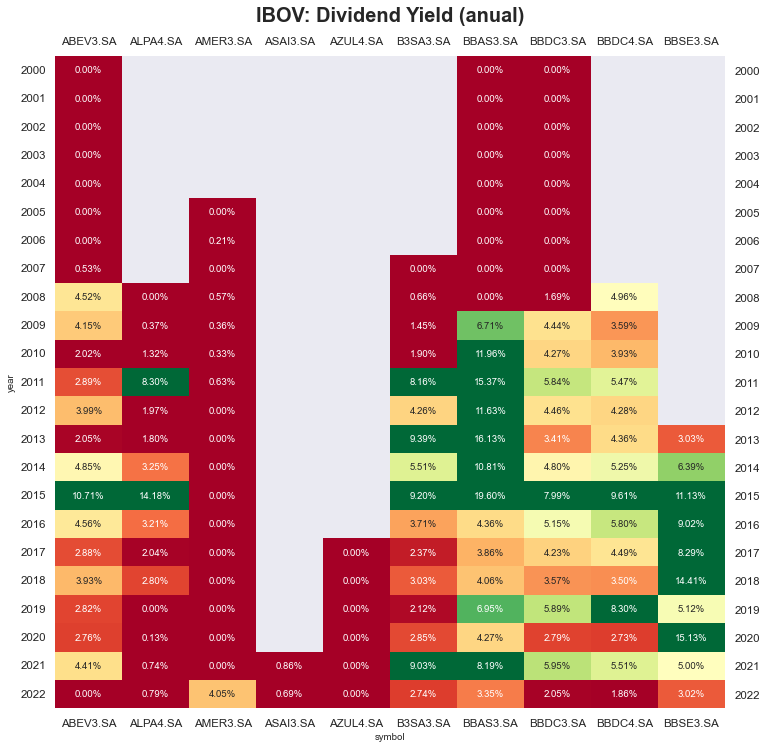

In [32]:
NUMBER_BASE = 5/100

#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_dy.iloc[:, 0:10], 'all_dy', carteira_teorica.upper(), 'anual', '.2%', NUMBER_BASE)

### Definindo um ano referência para estudo

In [33]:
ANO_REF = '2022'

#classificando por ano
df_dy_order = df_dy.transpose().sort_values(ANO_REF, ascending=False)
df_dy_order

year      2000  2001  2002  2003      2004      2005      2006      2007  \
symbol                                                                     
PETR4.SA   0.0   0.0   0.0   0.0  0.000000  0.055032  0.091505  0.050593   
PETR3.SA   0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
CMIN3.SA   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN   
VALE3.SA   0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
BRKM5.SA   0.0   0.0   0.0   0.0  0.000000  0.062957  0.121103  0.022047   
...        ...   ...   ...   ...       ...       ...       ...       ...   
COGN3.SA   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN   
CASH3.SA   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN   
BRFS3.SA   0.0   0.0   0.0   0.0  0.010885  0.000000  0.000000  0.000000   
AZUL4.SA   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN   
HAPV3.SA   NaN   NaN   NaN   NaN       NaN       NaN       NaN       NaN   

year          2008      2009  ...      2013      2014      2015      2016  \
symbol                        ...                                           
PETR4.SA  0.032128  0.067733  ...  0.047868  0.191468  0.000000  0.000000   
PETR3.SA  0.003420  0.054345  ...  0.016511  0.106364  0.000000  0.000000   
CMIN3.SA       NaN       NaN  ...       NaN       NaN       NaN       NaN   
VALE3.SA  0.042035  0.040388  ...  0.046566  0.136538  0.112436  0.009670   
BRKM5.SA  0.222280  0.000000  ...  0.000000  0.058869  0.035428  0.106596   
...            ...       ...  ...       ...       ...       ...       ...   
COGN3.SA       NaN       NaN  ...  0.017149  0.039347  0.018723  0.028147   
CASH3.SA       NaN       NaN  ...       NaN       NaN       NaN       NaN   
BRFS3.SA  0.004288  0.005492  ...  0.013109  0.013037  0.018284  0.028832   
AZUL4.SA       NaN       NaN  ...       NaN       NaN       NaN       NaN   
HAPV3.SA       NaN       NaN  ...       NaN       NaN       NaN       NaN   

year          2017      2018      2019      2020      2021      2022  
symbol                                                                
PETR4.SA  0.000000  0.076919  0.057520  0.000088  0.297498  0.423006  
PETR3.SA  0.000000  0.018565  0.028899  0.043571  0.267148  0.386011  
CMIN3.SA       NaN       NaN       NaN       NaN  0.076233  0.118107  
VALE3.SA  0.047073  0.053048  0.035522  0.035374  0.205235  0.106754  
BRKM5.SA  0.041391  0.053874  0.172232  0.000000  0.141905  0.099057  
...            ...       ...       ...       ...       ...       ...  
COGN3.SA  0.024200  0.044686  0.010530  0.000000  0.000000  0.000000  
CASH3.SA       NaN       NaN       NaN  0.000000  0.001906  0.000000  
BRFS3.SA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
AZUL4.SA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
HAPV3.SA       NaN  0.006015  0.004377  0.004283  0.006271  0.000000  

[90 rows x 23 columns]

In [34]:
#selecionando apenas um ano
df_dy_ano_ref = df_dy.transpose().sort_values(ANO_REF,ascending=False)[[ANO_REF]]
df_dy_ano_ref*100

year           2022
symbol             
PETR4.SA  42.300575
PETR3.SA  38.601101
CMIN3.SA  11.810745
VALE3.SA  10.675421
BRKM5.SA   9.905682
...             ...
COGN3.SA   0.000000
CASH3.SA   0.000000
BRFS3.SA   0.000000
AZUL4.SA   0.000000
HAPV3.SA   0.000000

[90 rows x 1 columns]

In [35]:
#verificando uma media entre os anos
df_media_anual_dy = df_dy.mean().sort_values(ascending=False)
df_media_anual_dy*100

symbol
CPLE6.SA     1635.928215
TAEE11.SA      16.628970
GOAU4.SA       12.827199
ELET6.SA       12.688736
CMIN3.SA        9.717035
                ...     
LWSA3.SA        0.052652
RAIL3.SA        0.012276
RRRP3.SA        0.000000
PRIO3.SA        0.000000
AZUL4.SA        0.000000
Length: 90, dtype: float64

In [36]:
#obtendo o dividendo acumulado no periodo
df_soma_acum = (1 + df_dy).cumprod()
df_soma_acum

symbol  ABEV3.SA  ALPA4.SA  AMER3.SA  ASAI3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  \
year                                                                           
2000    1.000000       NaN       NaN       NaN       NaN       NaN  1.000000   
2001    1.000000       NaN       NaN       NaN       NaN       NaN  1.000000   
2002    1.000000       NaN       NaN       NaN       NaN       NaN  1.000000   
2003    1.000000       NaN       NaN       NaN       NaN       NaN  1.000000   
2004    1.000000       NaN       NaN       NaN       NaN       NaN  1.000000   
2005    1.000000       NaN  1.000000       NaN       NaN       NaN  1.000000   
2006    1.000000       NaN  1.002053       NaN       NaN       NaN  1.000000   
2007    1.005270       NaN  1.002053       NaN       NaN  1.000000  1.000000   
2008    1.050707  1.000000  1.007758       NaN       NaN  1.006576  1.000000   
2009    1.094281  1.003696  1.011408       NaN       NaN  1.021140  1.067098   
2010    1.116342  1.016979  1.014748       NaN       NaN  1.040505  1.194776   
2011    1.148640  1.101407  1.021143       NaN       NaN  1.125369  1.378379   
2012    1.194450  1.123082  1.021143       NaN       NaN  1.173339  1.538644   
2013    1.218915  1.143287  1.021143       NaN       NaN  1.283509  1.786802   
2014    1.278010  1.180490  1.021143       NaN       NaN  1.354257  1.979982   
2015    1.414912  1.347889  1.021143       NaN       NaN  1.478875  2.368045   
2016    1.479385  1.391212  1.021143       NaN       NaN  1.533753  2.471197   
2017    1.522018  1.419581  1.021143       NaN       1.0  1.570053  2.566572   
2018    1.581875  1.459388  1.021143       NaN       1.0  1.617562  2.670750   
2019    1.626418  1.459388  1.021143       NaN       1.0  1.651826  2.856485   
2020    1.671302  1.461327  1.021143       NaN       1.0  1.698977  2.978585   
2021    1.745037  1.472100  1.021143  1.008583       1.0  1.852419  3.222468   
2022    1.745037  1.483784  1.062506  1.015512       1.0  1.903224  3.330482   

symbol  BBDC3.SA  BBDC4.SA  BBSE3.SA  ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
year                                  ...                                 
2000    1.000000       NaN       NaN  ...       NaN       NaN       NaN   
2001    1.000000       NaN       NaN  ...       NaN       NaN       NaN   
2002    1.000000       NaN       NaN  ...       NaN       NaN  1.000000   
2003    1.000000       NaN       NaN  ...       NaN       NaN  1.000000   
2004    1.000000       NaN       NaN  ...       NaN       NaN  1.000000   
2005    1.000000       NaN       NaN  ...  1.000000       NaN  1.000000   
2006    1.000000       NaN       NaN  ...  1.000000  1.000000  1.000000   
2007    1.000000       NaN       NaN  ...  1.000000  1.000000  1.000000   
2008    1.016910  1.049637       NaN  ...  1.000000  1.059480  1.026333   
2009    1.062047  1.087323       NaN  ...  1.000000  1.073705  1.044073   
2010    1.107447  1.130067       NaN  ...  1.024325  1.091724  1.073199   
2011    1.172081  1.191828       NaN  ...  1.053077  1.115411  1.090303   
2012    1.224300  1.242888       NaN  ...  1.068686  1.136654  1.103193   
2013    1.266030  1.297113  1.030299  ...  1.085455  1.162497  1.116996   
2014    1.326815  1.365260  1.096119  ...  1.125708  1.198498  1.133221   
2015    1.432840  1.496442  1.218124  ...  1.155630  1.246235  1.147887   
2016    1.506626  1.583216  1.328047  ...  1.189081  1.296474  1.161642   
2017    1.570419  1.654260  1.438202  ...  1.203762  1.312376  1.175140   
2018    1.626472  1.712159  1.645404  ...  1.231102  1.323989  1.191293   
2019    1.722227  1.854289  1.729725  ...  1.271085  1.334443  1.204026   
2020    1.770337  1.904850  1.991432  ...  1.321186  1.344468  1.210019   
2021    1.875751  2.009807  2.090915  ...  1.365319  1.359053  1.244994   
2022    1.914120  2.047092  2.154155  ...  1.386346  1.363550  1.297014   

symbol  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA  VIVT3.SA  WEGE3.SA  YDUQ3.SA  
year                                        

In [37]:
#obtendo o maior pagador de dividendo no periodo
df_soma_acum.iloc[-1].sort_values(ascending=False)

symbol
CPLE6.SA     1664.071992
GOAU4.SA       12.710690
TAEE11.SA      11.298131
CMIG4.SA        5.874907
VIVT3.SA        5.776936
                ...     
LWSA3.SA        1.001580
RAIL3.SA        1.000982
RRRP3.SA        1.000000
PRIO3.SA        1.000000
AZUL4.SA        1.000000
Name: 2022, Length: 90, dtype: float64

In [39]:
#verificando a soma dos dividendos dos ultimos 12 meses
df_dividends_rolling = df_tickers_dividends.rolling('365D').sum()
df_dividends_rolling

symbol                     RRRP3.SA  ALPA4.SA  ABEV3.SA  AMER3.SA  ASAI3.SA  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00+00:00       NaN       NaN    0.0000       NaN       NaN   
2000-01-06 00:00:00+00:00       NaN       NaN    0.0000       NaN       NaN   
2000-01-07 00:00:00+00:00       NaN       NaN    0.0000       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-11 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-12 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-15 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-16 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   

symbol                     AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  BRML3.SA  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-06 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-07 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00       0.0  0.706089  0.243945  1.450922   0.05361   
2022-08-11 00:00:00+00:00       0.0  0.706089  0.243945  1.450922   0.05361   
2022-08-12 00:00:00+00:00       0.0  0.706089  0.243945  0.930048   0.05361   
2022-08-15 00:00:00+00:00       0.0  0.706089  0.243945  0.930048   0.05361   
2022-08-16 00:00:00+00:00       0.0  0.706089  0.243945  0.930048   0.05361   

symbol                     ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  \
Date                       ...                                           
2000-01-03 00:00:00+00:00  ...       NaN       NaN       NaN   0.00000   
2000-01-04 00:00:00+00:00  ...       NaN       NaN       NaN   0.00000   
2000-01-05 00:00:00+00:00  ...       NaN       NaN       NaN   0.00000   
2000-01-06 00:00:00+00:00  ...       NaN       NaN       NaN   0.00000   
2000-01-07 00:00:00+00:00  ...       NaN       NaN       NaN   0.00000   
...                        ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-11 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-12 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-15 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-16 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   

symbol                      VALE3.SA  VIIA3.SA  VBBR3.SA  WEGE3.SA  YDUQ3.SA  \
Date                                                                           
2000-01-03 00:00:00+00:00   0.000000       0.0       NaN  0.000000       NaN   
2000-01-04 00:00:00+00:00   0.000000       0.0       NaN  0.000000       NaN   
2000-01-05 00:00:00+00:00   0.000000       0.0       NaN  0.000000       NaN   
2000-01-06 00:00:00+00:00   0.000000       0.0       NaN  0.000000       NaN   
2000-01-07 00:00:00+00:00   0.000000       0.0       NaN  0.000000       NaN   
...                              ...       ...       ...       ...       ...   
2022-08-10 00:00:00+00:00  11.916495       0.0  0.582261  0.469914  0.126239   
2022-08-11 00:00:00+00:00  11.916495       0.0  0.582261  0.469914  0.126239   
2022-08-12 00:00:00+00:00  15.488552       0.0  0.582261  0.469914  0.126239   
2022-08-15 00:00:00+00:00  15.488552       0.0  0.582261  0.469914  0.126239   
2022-08-16 00:00:00+0

In [40]:
df_dividends_rolling.tail()

symbol                     RRRP3.SA  ALPA4.SA  ABEV3.SA  AMER3.SA  ASAI3.SA  \
Date                                                                          
2022-08-10 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-11 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-12 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-15 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   
2022-08-16 00:00:00+00:00       0.0  0.434739    0.6036  0.620963  0.172071   

symbol                     AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  BRML3.SA  \
Date                                                                          
2022-08-10 00:00:00+00:00       0.0  0.706089  0.243945  1.450922   0.05361   
2022-08-11 00:00:00+00:00       0.0  0.706089  0.243945  1.450922   0.05361   
2022-08-12 00:00:00+00:00       0.0  0.706089  0.243945  0.930048   0.05361   
2022-08-15 00:00:00+00:00       0.0  0.706089  0.243945  0.930048   0.05361   
2022-08-16 00:00:00+00:00       0.0  0.706089  0.243945  0.930048   0.05361   

symbol                     ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  \
Date                       ...                                           
2022-08-10 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-11 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-12 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-15 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   
2022-08-16 00:00:00+00:00  ...  0.480376      0.23   0.78287   1.91788   

symbol                      VALE3.SA  VIIA3.SA  VBBR3.SA  WEGE3.SA  YDUQ3.SA  \
Date                                                                           
2022-08-10 00:00:00+00:00  11.916495       0.0  0.582261  0.469914  0.126239   
2022-08-11 00:00:00+00:00  11.916495       0.0  0.582261  0.469914  0.126239   
2022-08-12 00:00:00+00:00  15.488552       0.0  0.582261  0.469914  0.126239   
2022-08-15 00:00:00+00:00  15.488552       0.0  0.582261  0.469914  0.126239   
2022-08-16 00:00:00+00:00  15.488552       0.0  0.582261  0.469914  0.126239   

symbol                         year  
Date                                 
2022-08-10 00:00:00+00:00  507425.0  
2022-08-11 00:00:00+00:00  507426.0  
2022-08-12 00:00:00+00:00  507427.0  
2022-08-15 00:00:00+00:00  507428.0  
2022-08-16 00:00:00+00:00  507429.0  

[5 rows x 91 columns]